<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 1</h2></center>

<center><h3>Grading Table</h3></center>

|             | Part 1 | Part 2      | Part 3 | General Otline      | Total |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **Points**      | 30     | 30          | 30     | 10                  | 100   |

In [1]:
import warnings
warnings.filterwarnings('ignore')

# fundamental modules
import numpy as np
import pandas as pd

# sklearn
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# you can use for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# you can import any additional module you like

In [2]:
df = pd.read_csv('real_estate.csv')
df.head()

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Task

In this task, you are expected to:

* Make a linear regression analysis.
* Use the normal equation for your linear regression analysis to verify your results.
* Make a polynomial regression analysis (You can decide on the Nth degree).

<br>
You can drop the features that you find unnecessary.
<br>
You can use sklearn module to perform your analysis.
<br> 
It is advised to explore and visualize the dataset first.

# Part 1

In [3]:
y = df['housepriceofunitarea']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: housepriceofunitarea, Length: 414, dtype: float64

Text(0, 0.5, 'housepriceofunitarea')

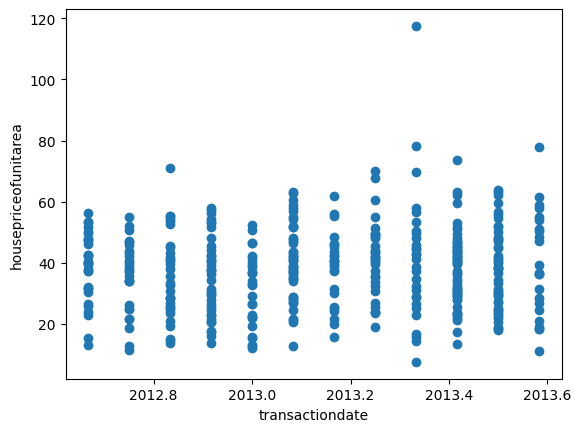

In [4]:
plt.scatter(df['transactiondate'], y) #Transaction date
plt.xlabel('transactiondate')
plt.ylabel('housepriceofunitarea')

Text(0, 0.5, 'housepriceofunitarea')

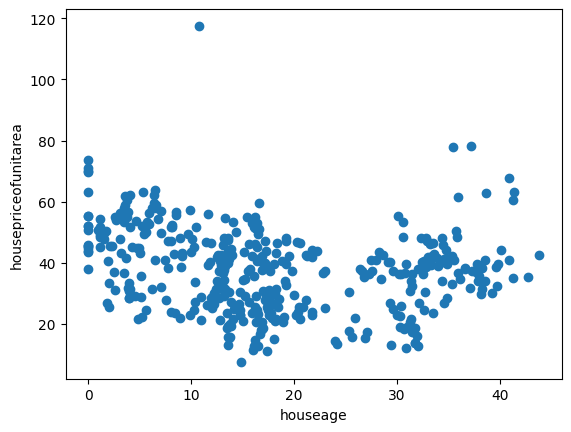

In [5]:
plt.scatter(df['houseage'], y) #house age
plt.xlabel('houseage')
plt.ylabel('housepriceofunitarea')

Text(0, 0.5, 'housepriceofunitarea')

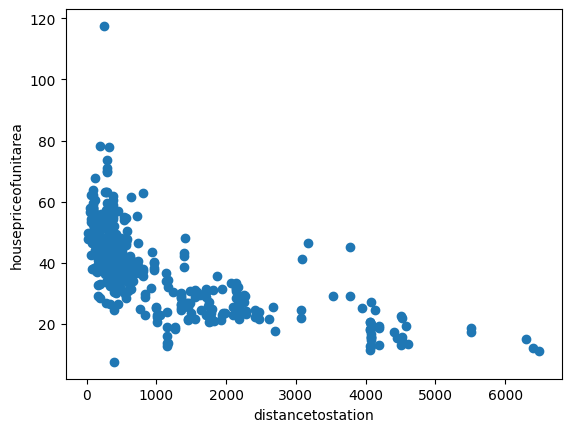

In [6]:
plt.scatter(df['distancetostation'], y) #distance to station
plt.xlabel('distancetostation')
plt.ylabel('housepriceofunitarea')

Text(0, 0.5, 'housepriceofunitarea')

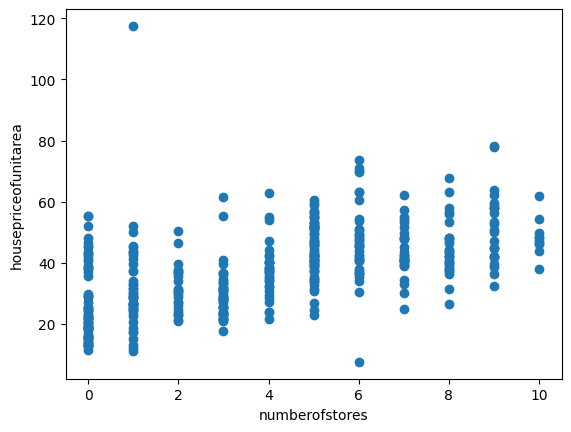

In [7]:
plt.scatter(df['numberofstores'], y) #number of stores
plt.xlabel('numberofstores')
plt.ylabel('housepriceofunitarea')

Text(0, 0.5, 'housepriceofunitarea')

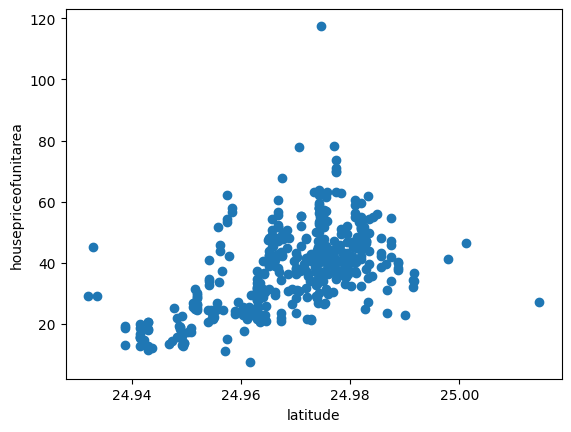

In [8]:
plt.scatter(df['latitude'], y) #latitude
plt.xlabel('latitude')
plt.ylabel('housepriceofunitarea')

Text(0, 0.5, 'housepriceofunitarea')

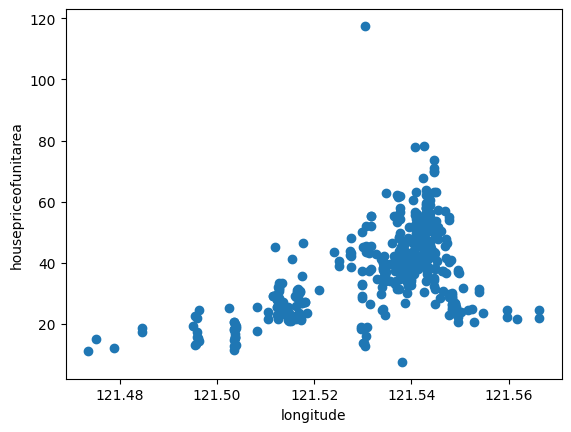

In [9]:
plt.scatter(df['longitude'], y) #longitude
plt.xlabel('longitude')
plt.ylabel('housepriceofunitarea')

In [10]:
df.drop(["No", "housepriceofunitarea"], axis = 1, inplace = True)

In [11]:
x = df
x

,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [12]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x, y)

In [13]:
b = linear_regression.coef_
b

array([ 5.14622746e+00, -2.69695448e-01, -4.48746107e-03,  1.13327690e+00,
        2.25472976e+02, -1.24236012e+01])

In [14]:
a = linear_regression.intercept_
a

-14437.100802280536

In [15]:
SST = np.sum((y - y.mean())**2)
SSR = np.sum((linear_regression.predict(x) - y)**2)
r_square = 1 - (SSR / SST)
r_square

0.582370447272306

In [16]:
sklearn.metrics.r2_score(y, linear_regression.predict(x))

0.582370447272306

['distancetostation', 'numberofstores', 'longitude'] =>  0.4968757093224051
['houseage', 'distancetostation', 'numberofstores', 'longitude'] => 0.541750275452026
['houseage', 'distancetostation', 'numberofstores', 'latitude', 'longitude'] => 0.5711617064827467
['transactiondate', 'houseage', 'distancetostation', 'numberofstores', 'latitude', 'longitude'] => 0.582370447272306

# Part 2

In [17]:
A = np.ones(x.shape[0])
padded_x = np.c_[A, x]
w = np.linalg.solve(np.dot(padded_x.T, padded_x), np.dot(padded_x.T, y))
w

array([-1.44371026e+04,  5.14622771e+00, -2.69695447e-01, -4.48746097e-03,
        1.13327691e+00,  2.25472976e+02, -1.24235905e+01])

In [18]:
sklearn.metrics.r2_score(y, np.dot(padded_x, w))

0.5823704472723029

# Part 3

In [19]:
x

,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [20]:
polynomial_degree = 2
poly = PolynomialFeatures(polynomial_degree, interaction_only=False)
x_poly = poly.fit_transform(x)
x_poly.shape

(414, 28)

In [21]:
poly2 = PolynomialFeatures(polynomial_degree, interaction_only=True)
x_poly2 = poly2.fit_transform(x)
x_poly2.shape

(414, 22)

In [22]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

LinearRegression()

In [23]:
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

LinearRegression()

In [24]:
sklearn.metrics.r2_score(y, poly_reg.predict(x_poly))

0.7062313674538039

In [25]:
sklearn.metrics.r2_score(y, poly_reg2.predict(x_poly2))

0.6773711267969049